<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/Floresta_Aleat%C3%B3ria_(Algoritmo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Floresta Aleatória
---


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)



Aqui será tratado do algoritmo de Machine Learning denominado de **Random Forest** ou **Floresta Aleatória**.

Esse algoritmo é uma melhoria da [Árvore de Decisão](https://bit.ly/2Guqmcd) que vem para sanar alguns problemas que ela tem, servindo para **classificação** ou **regressão** e tem as seguintes vantagens e desvantagens:

**Vantagens**
* Maior robustez, uma vez que tem um conjunto e não mais uma única árvore com regras.
* Menor propeção a sofrer overfitting se comparado ao algoritmo de *Árvore de Decisão*.
* Permite a descoberta do conhecimento, desde a listagem das features mais importantes até examinar cada árvore, extrair regra etc.
* Poucos parâmetros para ajuste.

**Desvantagens**
* Maior poder de processamento.
* Pode ser lento o processo de classificação de novas amostras.

![random](https://img.freepik.com/fotos-gratis/homem-novo-do-viajante-com-mapa-trouxa-na-floresta-verde-do-outono-no-dia-ensolarado_90380-195.jpg?size=626&ext=jpg)

Não temos intenção de esgotar todo o assunto aqui, mas trazer uma breve apresentação sobre esse algoritmo.

O **Random Forest** é um algoritmo de aprendizagem supervisionada que utiliza uma *ensemble*, ou seja, *combinação* de árvores de decisão e, na maioria dos casos é treinado pelo método *bagging* (Bootstrap Aggregating), que é um método que gera um conjunto de dados por amostragem, o **bootstrap** (técnica estatística) dos dados originais para que os classificadores sejam treinados de forma independente por diferentes conjuntos de treino.

O Random Forest será aplicado com objeto *RandomForestClassifier* da biblioteca *sklearn.ensemble* e seus **Parâmetros** são:

   * **n_estimators**: número de árvores que serão criadas na floresta.
   * **bootstrap**: se será considerado o bootstrap dataset durante a criação das árvores.
   * **max_features**: número total de features que as árvores serão criadas.
   * **criterion**: medida de qualidade da divisão.
   * **splitter**: estratégia utilizada para dividir o nó de decisão.
   * **max_depth**: profundidade máxima da árvore.
   * **min_samples_split**: número de amostras mínimas para considerar um nó para divisão.
   * **min_samples_leaf**: número de amostras mínimas no nível folha.

## Checklist
1. Análise Exploratória e Transformação dos Dados
2. Machine Learning
3. Validação
4. Visualização Gráfica das Features Mais Importantes
5. Selecionando Features Mais Importantes
6. Machine Learning com Features Selecionadas
7.   Validação do Novo Modelo 
8. Exploração das Àrvores Geradas pelo Random Forest

# 1. Análise Exploratória e Transformação dos Dados

Nessa base de dados, o **objetivo** é classificar a performance do aluno em sala de aula, se é baixa, média ou alta e visualizar quais fatores mais influenciam para que esse resultado

**Importação das bibliotecas**

In [1]:
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Leitura da base de dados**

In [2]:
df_edu = pd.read_csv('https://raw.githubusercontent.com/amadords/data/main/xAPI-Edu-Data.csv')

In [3]:
df_edu.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L


**Verificando as distribuições de classes em:** 
* Média
* Alta
* Baixa

In [4]:
df_edu['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

**Verificando os registros nulos**

In [5]:
df_edu.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

### Codificação dos atributos categóricos em numéricos
Obs.: Numa base de dados real, também deve ser testado com One Hot Encoding, Label Encoder (separados e combinados) e Get Dummies.


In [6]:
# codificando atributos numéricos
Features = df_edu # instanciando o df
# criando uma variável e percorrendo os dtypes, selecionandos o que for object
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
# para cada coluna categórica
for col in Cat_Colums:
# aplica o label encoder
    label = LabelEncoder()
# transforma os dados
    Features[col] = label.fit_transform(Features[col])

**Visualização das features tranformadas**

In [7]:
Features.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


# 2. Machine Learning

**Dividindo os dados em treino e teste**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_edu.drop('Class',1),df_edu['Class'],test_size=0.3,random_state=0)

**Verificando a forma dos dados de X**

In [9]:
X_train.shape,X_test.shape

((336, 16), (144, 16))

**Verificando a forma dos dados de y**


In [10]:
y_train.shape,y_test.shape

((336,), (144,))

**Instanciando o classificador**

In [11]:
random_clf = RandomForestClassifier()

**Treinando o random forest**

In [12]:
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Predizendo**

In [13]:
resultado = random_clf.predict(X_test)
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

# 3. Validação

**Métricas**

In [14]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70        39
           1       0.82      0.94      0.88        34
           2       0.79      0.77      0.78        71

    accuracy                           0.78       144
   macro avg       0.78      0.79      0.79       144
weighted avg       0.78      0.78      0.78       144



**Verificando as features mais importantes para o modelo treinado**

In [15]:
random_clf.feature_importances_

array([0.02332709, 0.03503879, 0.03537686, 0.01485609, 0.032308  ,
       0.01946333, 0.04337904, 0.01049457, 0.04504994, 0.16638832,
       0.17569229, 0.12931373, 0.09394096, 0.03510037, 0.01874116,
       0.12152948])

**Listando como uma series pandas as features importantes**

In [16]:
feature_imp = pd.Series(random_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

VisITedResources            0.175692
raisedhands                 0.166388
AnnouncementsView           0.129314
StudentAbsenceDays          0.121529
Discussion                  0.093941
Relation                    0.045050
Topic                       0.043379
PlaceofBirth                0.035377
ParentAnsweringSurvey       0.035100
NationalITy                 0.035039
GradeID                     0.032308
gender                      0.023327
SectionID                   0.019463
ParentschoolSatisfaction    0.018741
StageID                     0.014856
Semester                    0.010495
dtype: float64

# 4. Visualização Gráfica das Features Mais Importantes

**Criando função para visualizar Features importantes**

In [17]:
def visualiza_features_importantes(features_lista):
    %matplotlib inline

    plt.figure(figsize=(16,8))
    sns.barplot(x=features_lista, y=features_lista.index)

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

**Visualizando**

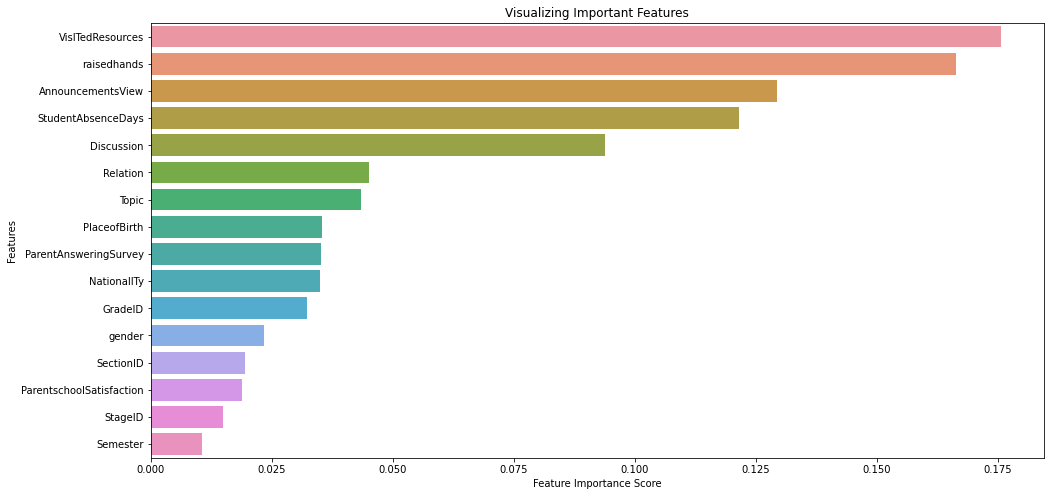

In [18]:
visualiza_features_importantes(feature_imp)

# 5. Selecionando Features Mais Importantes
Teoricamente, utilizando apenas as features mais importantes traz uma maior precisão ao algoritmo.

**Selecionando as features mais importantes**

In [19]:
features_selecionadas = []
for feature,importancia in feature_imp.iteritems(): # iteritems para iterar sobre cada item da serie
    if importancia > 0.03:
        print("{}:\t{}".format(feature, importancia))
        features_selecionadas.append(feature)

VisITedResources:	0.1756922871553843
raisedhands:	0.16638832122568054
AnnouncementsView:	0.1293137253615364
StudentAbsenceDays:	0.1215294826625705
Discussion:	0.09394095951134211
Relation:	0.045049941576791507
Topic:	0.043379035000087766
PlaceofBirth:	0.03537685556816527
ParentAnsweringSurvey:	0.035100374179582054
NationalITy:	0.035038787027647296
GradeID:	0.03230799619847214


**Visualização das features mais importantes**

In [20]:
features_selecionadas

['VisITedResources',
 'raisedhands',
 'AnnouncementsView',
 'StudentAbsenceDays',
 'Discussion',
 'Relation',
 'Topic',
 'PlaceofBirth',
 'ParentAnsweringSurvey',
 'NationalITy',
 'GradeID']

# 6. Machine Learning com Features Selecionadas

**Separando os dados em treino e teste utilizando apenas as features selecionadas**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df_edu[features_selecionadas],
    df_edu['Class'],
    test_size=0.3,
    random_state=0
)

**Novas forma dos dados em X e y**

In [22]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((336, 11), (144, 11), (336,), (144,))

**Instanciando o classificador**

In [23]:
# instanciando o classificador
random_clf = RandomForestClassifier(random_state=0)
# Treinando novamente o modelo Random Forest
random_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**Executando o algoritmo**

In [24]:
resultado = random_clf.predict(X_test)
resultado

array([2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1,
       0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0])

# 7. Validação do Novo Modelo

**Métricas**

In [25]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        39
           1       0.80      0.94      0.86        34
           2       0.80      0.73      0.76        71

    accuracy                           0.78       144
   macro avg       0.77      0.80      0.78       144
weighted avg       0.78      0.78      0.78       144



Perceba que, **nesse caso** os resultados não sofreram alterações muito grande.
Nesse caso houve uma piora, embora pequena nos resultados, contudo esse trabalho é necessário e **dever do cientista de dados** não apenas fazer esse trabalho, mas outros também, afinal a *skill* mais negligenciada pelos aspirantes é justamente a análise científica.

# 8. Exploração das Àrvores Geradas pelo Random Forest

* Apenas para fins didáticos, por isso a exploração em baixo nível

In [26]:
# random_clf é o próprio clf -> RandomForestClassifier(random_state=0)
# aqui estão sendo explorados seus atributos internos
print("Número de árvores da floresta: {}".format(len(random_clf.estimators_))) 
print("Árvores floresta gerada:")
for tree in random_clf.estimators_: # cada estimator são os atributos de uma árvore
    print("\nNumero de nós: {}".format(tree.tree_.node_count)) # contagem de nós
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth)) # profundidade
    print("Features importantes: {}".format(tree.feature_importances_)) # features importantes
    print("\nObjeto: {}".format(tree)) #  árvore de decisão

Número de árvores da floresta: 100
Árvores floresta gerada:

Numero de nós: 137
Profundidade da árvore: 11
Features importantes: [0.29508491 0.12996712 0.07784893 0.12847095 0.04857555 0.06625861
 0.02485004 0.06129201 0.06444364 0.04591235 0.05729589]

Objeto: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=209652396, splitter='best')

Numero de nós: 173
Profundidade da árvore: 13
Features importantes: [0.31498216 0.19463482 0.09195005 0.09397771 0.05017543 0.02865592
 0.06837503 0.03378123 0.05759289 0.05658805 0.00928672]

Objeto: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_

**Selecionando a Árvore 0**

In [27]:
tree0 = random_clf.estimators_[0]

**Visualizando a Árvore 0**

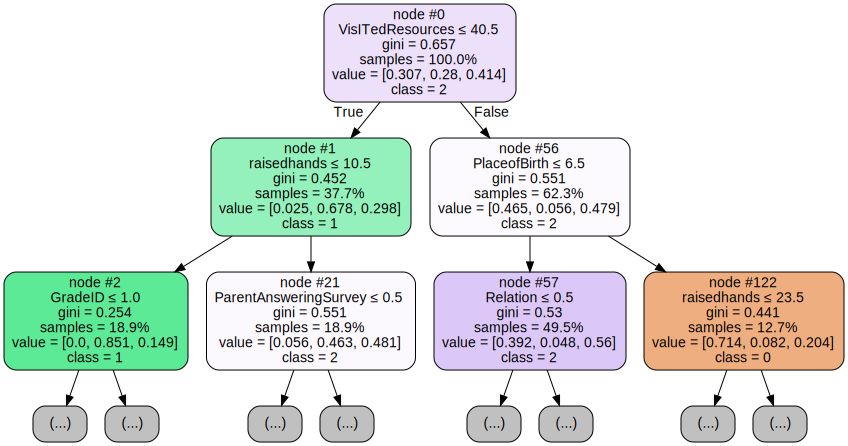

In [28]:

from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=2,# a limitação é somente para a visualização
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

**Selecionando e Visualizando a Árvore 1**

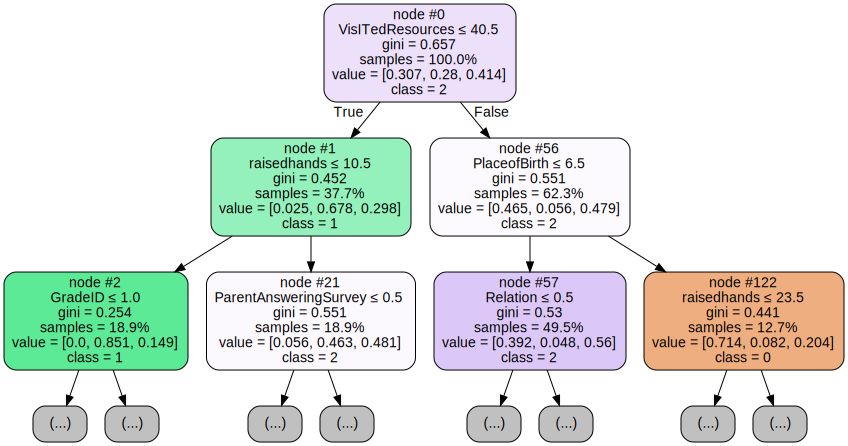

In [29]:
tree1 = random_clf.estimators_[1]
# visualizando graficamente
from sklearn.tree import export_graphviz
import graphviz 

dot_data = export_graphviz(
         tree0,
         max_depth=2,# a limitação é somente para a visualização
         out_file=None,
         feature_names=X_train.columns,
         class_names=['0','1','2'], 
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

Para **entender** o que acontece na árvore, vamos pegar a **Árvore 1** como exemplo.

O atributo `StudentAbsenceDays` é o que melhor generaliza os dados, por isso está no topo, ou seja, no *nó zero*.

Se o atributo acima é *True* vai para o atributo `ParentAnsweringSurvey`, ou seja, para o *nó um*. Se é *False* vai para o atributo `NationalITy` que é o *nó cinquenta e oito*.

Quanto mais se desce, mais se aprofunda ou mais se especifica, ou seja, a árvore vai "perdendo" a capacidade de generalizar, razão pela qual é *boa prática* utilizar o parâmetro **max_depth** para controlar a profundidade máxima da árvore.



# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)


<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>